# Install functions and libraries

## Install packages

In [1]:
#!pip install numpy>=1.24.1
!pip install qiskit --quiet
!pip install qiskit_aer --quiet
!pip install pylatexenc --quiet
!pip install qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install pytket --quiet
!pip install pytket-qiskit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.6/249.6 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 28.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting r

In [3]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
import sys
import matplotlib.pyplot as plt

## Declare funtions

Calculating the weighted interaciton graph

In [4]:
def interaction_graph(quantum_circuit):
    dag = circuit_to_dag(quantum_circuit)
    graph = nx.Graph()

    qubit_weights = {}
    for node in dag.topological_op_nodes():
        qargs = node.qargs
        hada = 0
        if len(qargs) == 1:
          hada = 1
        for qubit in qargs:
            if qubit not in qubit_weights:
                qubit_weights[qubit] = 0
            if hada:
                qubit_weights[qubit] += 1

    for qubit, weight in qubit_weights.items():
        graph.add_node(qubit, weight=weight)

    qubit_pairs = {}
    for node in dag.topological_op_nodes():
        qargs = node.qargs
        if len(qargs) > 1:
            pair = (qargs[0], qargs[1])
            if pair not in qubit_pairs:
              pair2 = (qargs[1], qargs[0])
              if pair2 not in qubit_pairs:
                qubit_pairs[pair] = 1
              else:
                qubit_pairs[pair2] += 1
            else:
              qubit_pairs[pair] += 1

    for pair, weight in qubit_pairs.items():
        qubit1, qubit2 = pair
        graph.add_edge(qubit1, qubit2, weight=weight)

    return graph

Calculation of the interaction adjacency matrix.

A weight of a cell matrix[a][b] is the amount of times a gate featuring the qubits "a" and "b" appears on the circuit. For single-qubit gates a=b.

In [5]:
def get_adjacency_matrix(circuit):
    num_qubits = circuit.num_qubits
    adjacency_matrix=[]
    total = 0
    for i in range(0,num_qubits):
        fila = []
        for j in range(0,num_qubits):
          fila.append(0)
        adjacency_matrix.append(fila)

    for gate in circuit.data:
        if len(gate[1]) == 1:
            qubit = int(  str(  gate[1][0]).split(',')[-1][1:].split(')')[0]  )
            key = str(  gate[1][0]).split(',')[-2][1:-1].strip()[1]
            if key == str("b"):
              qubit += int(len(circuit.qubits)/2)
            adjacency_matrix[qubit][qubit] += 1
            total +=1
        elif len(gate[1]) == 2:
          qubit1 = int( str(  gate[1][0]).split(',')[-1][1:].split(')')[0])
          qubit2 = int( str(  gate[1][1]).split(',')[-1][1:].split(')')[0])

          key = str(  gate[1][0]).split(',')[-2][1:-1].strip()[1]
          if key == str("b"):
              qubit1 += int(len(circuit.qubits)/2)
          key = str(  gate[1][1]).split(',')[-2][1:-1].strip()[1]
          if key == str("b"):
            qubit2 += int(len(circuit.qubits)/2)

          adjacency_matrix[qubit1][qubit2] += 1
          adjacency_matrix[qubit2][qubit1] += 1
          total +=1
    adjacency_matrix.append(total)
    return adjacency_matrix

Obtaining a key from a dictionary of probabilities based on the weights of the keys

In [6]:
import random
def random_sampling(weighted_dict):
    keys = list(weighted_dict.keys())
    weights = list(weighted_dict.values())
    sampled_key = random.choices(keys, weights=weights, k=1)[0]
    return sampled_key


Obtaining the metrics from the original circuit

In [7]:
from qiskit.converters import dag_to_circuit
" Returns a dictionary with the positions (in slices) of the gates of each qubit"
def posiciones_gates_slices(circuito):
  circ = circuito
  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]
  posiciones = {}
  for i in range (0,circ.num_qubits):
    posiciones[i] = set()
    posiciones[i].add(0)
  for i,layer_as_circuit in enumerate(layers):
      for op in layer_as_circuit.data:
          q_index = circ.find_bit(op.qubits[0]).index
          for j in range(0,len(op.qubits)):
            posiciones[circ.find_bit(op.qubits[j]).index].add(i)
  for i in range (0,circ.num_qubits):
    posiciones[i].add(len(layers))
  for qub in posiciones.keys():
    posiciones[qub] = sorted(list(posiciones[qub]))
  return posiciones

" Calculates the distances from the positions of the gates in the qubits"
def distancias_gates_slices(posiciones):
  distancias = {}
  for i in range (0,len(posiciones.keys())):
    distancias[i] = []
    pos_i = posiciones[i]
    for j in range (1, len(pos_i)):
      actual = pos_i[j] - pos_i[j-1]
      distancias[i].append(actual)
  return distancias
" Groups the distances from the different qubits into an unique dictionary of counts"
def crea_probabilidades(distancias):
    counter = {}
    for qubit in distancias.keys():
      lista_Q = distancias[qubit]
      for distancia in lista_Q:
        if distancia not in counter.keys():
          counter[distancia] = 0
        counter[distancia] +=1
    return counter
" Returns the probabilities dividing the counts of distnaces by the total amount of the counts"
def calcula(suma):
    final = {}
    count = 0
    for k in suma.keys():
        count += suma[k]
    for k in suma.keys():
      final[k] = suma[k]/count
    return final

" Returns the distribution of gates in slices"
def calcula_distribucion(circuito):
  plot_histogram = {}
  circ = circuito
  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]
  for i,layer_as_circuit in enumerate(layers):
      n_gates = len(layer_as_circuit.data)
      if n_gates == 24 and circuito == q_circ2:
        continue #Debug virtual gates
      if n_gates not in plot_histogram.keys():
        plot_histogram[n_gates] = 0
      plot_histogram[n_gates] +=1

  return dict(sorted(plot_histogram.items()))

" Returns the distribution of gates in slices with the probabilities as the values"
def probDic(distribucion):
  probabilidades = {}
  total = 0
  for numero in distribucion.keys():
    total += distribucion[numero]
  for numero in distribucion.keys():
    probabilidades[numero] = distribucion[numero]/total
  return probabilidades

Shows a plot representing a dictionary. Used to represent the gates in slices distribution.

In [8]:
def distribucion_gates_por_slice(aux):

  # Extraer claves y valores del diccionario
    keys = list(aux.keys())
    values = list(aux.values())

    plt.bar(keys, values, color='blue')

    # Configurar etiquetas
    plt.xlabel('Gates in the Slice')
    plt.ylabel('Count')
    plt.title('Distribution of gates in slices')

    # Mostrar histograma
    plt.show()

### Statistic tests to compare distributions

In [9]:
import scipy.stats as stats
def CompareDistributions(Synthetic, Original):
  data1 = []
  data2 = []

  for key,value in Synthetic.items():
    data1.extend([key]*value)

  for key,value in Original.items():
    data2.extend([key]*value)

  # Kolmogorov-Smirnov
  result_1 = stats.ks_2samp(data1, data2)

  # Anderson-Darling
  result_2 = stats.anderson_ksamp([data1, data2])

  print("Statistic of test 1 (Kolmogorov-Smirnov):", result_1.statistic)
  print("P value of test 1:", result_1.pvalue)

  print("Statistic of test 2 (Anderson-Darling):", result_2.statistic)
  print("P value of test 2:", result_2.pvalue)

### Entropies

In [10]:
def calculate_entr(matrix):
    matrix_np = np.array(matrix)
    prob_values = np.bincount(matrix_np.flatten()) / matrix_np.size
    prob_values_no_zero = prob_values[prob_values != 0]
    entro = -np.sum(prob_values_no_zero * np.log2(prob_values_no_zero))
    return entro

Calculates the matrix associated with a circuit

In [11]:
" Returns a matrix where the x-axis is the time and the y-axis the qubit number. There's a 1 in a cell[x][y] if the qubit x interacts in the slice y"
def calcula_matriz_de_circuito(circuito):
  eje_y = len(q_circ0.qubits)


  circ = circuito
  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]
  #print(len(layers))
  eje_x = min(100, len(layers)) #depth

  # Un elemento de la lista es un slice, dentro de un slice hay un elemento por qubit
  matriz_pura = [[0 for _ in range(eje_y)] for _ in range(eje_x)]

  for i in range(eje_x):
      layer_as_circuit = layers[i]
      n_gates = len(layer_as_circuit.data)
      for operacion in layers[2].data:
        for qub in operacion.qubits:
          participa = int(str(qub).split(',')[-1][1:-1])
          matriz_pura[i][participa] = 1

  return matriz_pura

### Mountain ordination

Checks the ordination of the slices of the origianl circuit

In [12]:
def calcula_orden_temporal(circuito):

  plot_histogram = []

  circ = circuito

  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]
  print(len(layers))
  for i,layer_as_circuit in enumerate(layers):
      #print(len(layer_as_circuit.data))
      n_gates = len(layer_as_circuit.data)
      plot_histogram.append(n_gates)

  return plot_histogram

Plots the slices

In [13]:
def crea_hist_temporal(base):
  vector = base
  plt.scatter(range(len(vector)), vector)

  plt.xlabel('Índice de slice')
  plt.ylabel('Gates en el slice')

  plt.show()

Order the slices in a mountain shape

In [14]:
def ordena_sampleos(vector_samplings):
  vec_orden = []
  base = sorted(vector_samplings)
  base_inv = base[::-1]
  for i in range(len(base_inv)):
    if i%2 == 0:
      vec_orden.append(base_inv[i])
    else:
      vec_orden.insert(0,base_inv[i])
  return vec_orden

### Synthetic circuit

Definition of the synthetic circuits.

The first function is used in the pseudo-random strategy when sampling from the distribution of gates in slices.

The second function is used to calculate the weights of all the possible gates.

The third function is the main code of the generator, where all the process explained in the Thesis happens.

In [15]:
" Random sampling for slices"
" Takes into consideration the actual sampled average, the objective average, and the previous sample"
" If the averages are close (15% of difference), random sampling"
" If the averages are different (> 15% of difference), higher or lower sampled values in order to bring the two averages closer"
" (Out of the function) Once a key is sampled, it's probability gets halved."
def random_samplingMountain(weighted_dict, anterior, media_actual, objetivo):
    if media_actual == 0:
        # Primera iteración
        keys = list(weighted_dict.keys())
        weights = list(weighted_dict.values())
        sampled_key = random.choices(keys, weights=weights, k=1)[0]
        return sampled_key
    else:
        # Hay que acercarnos a la media
        diferencia = media_actual - objetivo
        if abs(diferencia) / objetivo < 0.15:
            # Estamos en un margen del 15% de la media objetivo, sampleamos igual
            filtered_keys = [key for key in weighted_dict.keys()]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]
        elif diferencia < 0:
            # Tenemos una media inferior
            filtered_keys = [key for key in weighted_dict.keys() if key >= (anterior) and key <= (anterior + (0.4 * len(weighted_dict.keys())))]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]
        else:
            # Tenemos una media superior
            filtered_keys = [key for key in weighted_dict.keys() if key >= (anterior - (0.4 * len(weighted_dict.keys()))) and key <= (anterior)]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]

        sampled_key = random.choices(filtered_keys, weights=filtered_weights, k=1)[0]
        return sampled_key

def PodaPosiblesMountain(qbs_no, probs_dists, probs_dentro_1_qubit, distancias, lista_total, lista_valida, chains_og, cadenas):
  posibilidades = {}

  lista_posibles = [x for x in lista_total if x not in qbs_no]

  for i in range(0,len(lista_posibles)):
    qub1 = lista_posibles[i]
    for j in range(0,len(lista_posibles)):
      qub2 = lista_posibles[j]
      probabilidad = 0
      if qub1==qub2:
        "Single qubit gate"
        probabilidadQubitActue = probs_dists[distancias[qub1]] * chains_og[cadenas[qub1]]
        probabilidadSingleGate = probs_dentro_1_qubit[qub1][qub1] / probs_dentro_1_qubit[-1]
        " We can only use qubits from the previous slice, since its a single qubit gate"
        puede = 0
        if qub1 in lista_valida:
          puede = 1
        probabilidad = probabilidadQubitActue * probabilidadSingleGate * puede
      else:
        "Two qubit gate"
        probabilidadQubit1Actue = probs_dists[distancias[qub1]] * chains_og[cadenas[qub1]]
        probabilidadQubit2Actue = probs_dists[distancias[qub2]] * chains_og[cadenas[qub2]]
        probabilidadTwoGate = (probs_dentro_1_qubit[qub1][qub2]+probs_dentro_1_qubit[qub2][qub1]) / probs_dentro_1_qubit[-1]

        " If one of the qubits has been used on the last slice, the gate is possible"
        puede = 0

        if qub1 in lista_valida or qub2 in lista_valida:
          #print("MIRA GATE", i, j, lista_valida)
          puede = 1

        probabilidad = probabilidadQubit1Actue * probabilidadQubit2Actue * probabilidadTwoGate * puede

      if probabilidad != 0:
        if qub1 not in lista_valida and qub2 not in lista_valida:
          print("AQUI PASA", qub1, qub2, lista_valida)
        posibilidades[(qub1,qub2)] = probabilidad

  return posibilidades

def CreaCircuitoMountain(n_qubits,depth,distribucion,probabilidades,grafo, chains_og):
  circuito = QuantumCircuit(n_qubits)
  lista_Total = [x for x in range(0,n_qubits)]
  distancias = {}
  cadenas = {}
  for i in range(n_qubits):
    cadenas[i] = 0
  for w in range(0,n_qubits):
    distancias[w] = 1
  distancia_maxima = max(probabilidades, key=probabilidades.get)


  anterior = 0 # previous
  lista_valida = lista_Total # qubits available for the slice, initialy all of them

  " Sampling and order, we take into consideration: "
  " 1- The original average, to bring us closer with the samples"
  " 2- The average of the samples"
  " 3- The previous sample"
  " 4- Last, we order the samples in a mountain shape"
  suma_original = 0
  for elem in distribucion.keys():
    suma_original += distribucion[elem]*elem
  media_original = suma_original / sum(list(distribucion.values())) # ideal average of the samples

  suma_samplings = 0
  media_samplings = 0
  anterior = 0 # previous sample
  slices_sizes = [] # samples

  diccionario_para_samplear = {} # when a key is sampled: dic[key] /=2
  for k in distribucion.keys():
    diccionario_para_samplear[k] = float(distribucion[k]) # floats to prevent the division / 2 to create 0s

  for _ in range(depth):
    sample_i = random_samplingMountain(diccionario_para_samplear,anterior, media_samplings,media_original)
    suma_samplings += sample_i
    slices_sizes.append(sample_i)
    media_samplings = suma_samplings / len(slices_sizes)
    anterior = sample_i
    diccionario_para_samplear[sample_i] = diccionario_para_samplear[sample_i]/2

    sampleos_ordenados = ordena_sampleos(slices_sizes)

  " For every slice "

  for i in range(len(sampleos_ordenados)):

    " The i slice will have sampleos_ordenados[i] gates, those samples are prior to the construction of the circuit"
    numero_gates_slice = sampleos_ordenados[i]


    if i%10 == 0:
      #print(i,depth-1,numero_gates_slice)
      test=0

    for x in range(0,25):
      " Trying up to 25 tries to fill slices"
      completa = True
      gates_a_añadir = []
      qubits_usados = []
      " A try to fill the slice"
      for j in range(0, numero_gates_slice):

        #Generar probabilidades
        posibilidades = PodaPosiblesMountain(qubits_usados,probabilidades,grafo,distancias, lista_Total, lista_valida, chains_og, cadenas)
        #Sampling probabilidades
        if len(posibilidades) == 0:
          completa = False
          break

        gate_a_añadir = random_sampling(posibilidades)

        q1,q2 = gate_a_añadir
        qubits_usados.append(q1)

        gates_a_añadir.append((q1,q2))

        if q1 != q2:
          qubits_usados.append(q2)
      #print(completa, i, len(gates_a_añadir),numero_gates_slice)
      if completa:
        " Increase the chains of the used qubits "
        for qubit in cadenas.keys():
          if qubit in qubits_usados:
            if cadenas[qubit] < len(chains_og.keys())-1:
              cadenas[qubit] += 1
              #print(cadenas[qubit], max(chains_og.keys()))
          else:
            cadenas[qubit] = 0

        "We have managed to add all gates"
        for q1,q2 in gates_a_añadir:
          if grafo[q1][q2] > 1:
            grafo[q1][q2] -= 1
          else:
            grafo[q1][q2] = sys.float_info.epsilon
          #grafo[q1][q2] /= 2

          if q1 == q2:
            circuito.h(q1)
          else:
            circuito.cx(q1,q2)


        for qub in distancias.keys():
          if qub not in qubits_usados:
              if distancias[qub] < distancia_maxima:
                distancias[qub]+=1
          else:
            distancias[qub] = 1
        lista_valida = qubits_usados
        break

      else:
        " Slice NOT full, re-try"
        if x+1 > 24:
          print("On the ", i, " slice, ", len(gates_a_añadir), " gates out of ", numero_gates_slice, " were added. Try", (x+1))

  return circuito, sampleos_ordenados

### Gate-density aware random

In [16]:
def random_samplingRandom(weighted_dict, anterior, media_actual, objetivo):
    if media_actual == 0:
        # Primera iteración
        keys = list(weighted_dict.keys())
        weights = list(weighted_dict.values())
        sampled_key = random.choices(keys, weights=weights, k=1)[0]
        return sampled_key
    else:
        # Hay que acercarnos a la media
        diferencia = media_actual - objetivo
        if abs(diferencia) / objetivo < 0.15:
            # Estamos en un margen del 15% de la media objetivo, sampleamos igual
            filtered_keys = [key for key in weighted_dict.keys()]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]
        elif diferencia < 0:
            # Tenemos una media inferior
            filtered_keys = [key for key in weighted_dict.keys() if key >= (anterior) and key <= (anterior + (0.4 * len(weighted_dict.keys())))]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]
        else:
            # Tenemos una media superior
            filtered_keys = [key for key in weighted_dict.keys() if key >= (anterior - (0.4 * len(weighted_dict.keys()))) and key <= (anterior)]
            filtered_weights = [weighted_dict[key] for key in filtered_keys]

        sampled_key = random.choices(filtered_keys, weights=filtered_weights, k=1)[0]
        return sampled_key


def Poda2(qbs_no, lista_total, lista_valida):
  posibilidades = {}

  lista_posibles = [x for x in lista_total if x not in qbs_no and x in lista_valida]
  otros = [x for x in lista_total if x not in lista_valida]
  sample_1 = random.choice(lista_total)
  sample_2 = random.choice(lista_total+otros+otros+otros)

  while sample_1 not in lista_valida and sample_2 not in lista_valida:
    sample_1 = random.choice(lista_total)
    sample_2 = random.choice(lista_total+otros+otros+otros)
    if len(lista_valida) == 0:
      break


  posibilidades[(sample_1,sample_2)] = 1
  posibilidades[(sample_2,sample_1)] = 1
  posibilidades[(random.choice(lista_total),random.choice(lista_total))] = 1

  return posibilidades


def PodaPosiblesRandom(qbs_no, probs_dists, probs_dentro_1_qubit, distancias, lista_total, lista_valida):
  posibilidades = {}

  lista_posibles = [x for x in lista_total if x not in qbs_no]
  for i in range(0,len(lista_posibles)):
    qub1 = lista_posibles[i]
    for j in range(0,len(lista_posibles)):
      qub2 = lista_posibles[j]
      probabilidad = 0
      if qub1==qub2:

        probabilidadQubitActue = probs_dists[distancias[qub1]]
        probabilidadSingleGate = probs_dentro_1_qubit[qub1][qub1] / probs_dentro_1_qubit[-1]

        puede = 0
        if qub1 in lista_valida:
          puede = 1
        probabilidad = probabilidadQubitActue * probabilidadSingleGate * puede
        probabilidad = 1 * puede
      else:

        probabilidadQubit1Actue = probs_dists[distancias[qub1]]
        probabilidadQubit2Actue = probs_dists[distancias[qub2]]
        probabilidadTwoGate = (probs_dentro_1_qubit[qub1][qub2]+probs_dentro_1_qubit[qub2][qub1]) / probs_dentro_1_qubit[-1]


        puede = 0

        if qub1 in lista_valida or qub2 in lista_valida:

          puede = 1

        probabilidad = probabilidadQubit1Actue * probabilidadQubit2Actue * probabilidadTwoGate * puede
        probabilidad = 1 * puede

      if probabilidad != 0:
        if qub1 not in lista_valida and qub2 not in lista_valida:
          print("AQUI PASA", qub1, qub2, lista_valida)
        posibilidades[(qub1,qub2)] = probabilidad

  return posibilidades


def CreaCircuitoRandom(n_qubits,depth,distribucion,probabilidades,grafo):
  circuito = QuantumCircuit(n_qubits)
  lista_Total = [x for x in range(0,n_qubits)]
  distancias = {}
  for w in range(0,n_qubits):
    distancias[w] = 1
  distancia_maxima = max(probabilidades, key=probabilidades.get)


  anterior = 0
  lista_valida = lista_Total


  suma_original = 0
  for elem in distribucion.keys():
    suma_original += distribucion[elem]*elem
  media_original = suma_original / sum(list(distribucion.values()))

  suma_samplings = 0
  media_samplings = 0
  anterior = 0
  slices_sizes = []

  diccionario_para_samplear = {}
  for k in distribucion.keys():
    diccionario_para_samplear[k] = float(distribucion[k])
  for _ in range(depth):
    sample_i = random_samplingRandom(diccionario_para_samplear,anterior, media_samplings,media_original)
    suma_samplings += sample_i
    slices_sizes.append(sample_i)
    media_samplings = suma_samplings / len(slices_sizes)
    anterior = sample_i
    diccionario_para_samplear[sample_i] = diccionario_para_samplear[sample_i]/2

    sampleos_ordenados = ordena_sampleos(slices_sizes)


  for i in range(len(sampleos_ordenados)):


    numero_gates_slice = sampleos_ordenados[i]


    if i%10 == 0:

      test=0

    for x in range(0,5):

      completa = True
      gates_a_añadir = []
      qubits_usados = []

      for j in range(0, numero_gates_slice):

        posibilidades = Poda2(qubits_usados, lista_Total, lista_valida)

        if len(posibilidades) == 0:
          completa = False
          break

        gate_a_añadir = random_sampling(posibilidades)

        q1,q2 = gate_a_añadir
        qubits_usados.append(q1)

        gates_a_añadir.append((q1,q2))

        if q1 != q2:
          qubits_usados.append(q2)

      if completa:

        for q1,q2 in gates_a_añadir:
          if q1 == q2:
            circuito.h(q1)
          else:
            circuito.cx(q1,q2)


        for qub in distancias.keys():
          if qub not in qubits_usados and distancias[qub] < distancia_maxima:
              distancias[qub]+=1
          else:
            distancias[qub] = 1
        lista_valida = qubits_usados
        break

      else:

        print("On the ", i, " slice, ", len(gates_a_añadir), " gates out of ", numero_gates_slice, " were added. Try", (x+1))

  return circuito, sampleos_ordenados

### Total random

In [17]:
def CreaRandomTotal(qubits,gates):
  a_devolver = QuantumCircuit(qubits)
  posibles = [x for x in range(qubits)]
  for _ in range(gates):
    q1 = random.choice(posibles)
    q2 = random.choice(posibles)

    if q1 == q2:
      a_devolver.h(q1)
    else:
      a_devolver.cx(q1,q2)

  return a_devolver

### HeatMap

In [18]:
" Creates the number association depending on the gates of each qubit in each slice: 0s for no interaction, 1s for two-qubit gates, and 2s for single-qubit gates"
def matriz_pintar(circuito):
  eje_y = len(circuito.qubits)

  circ = circuito
  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]

  eje_x = len(layers)

  matriz_pura = [[0 for _ in range(eje_y)] for _ in range(eje_x)]


  for i in range(eje_x):
      layer_as_circuit = layers[i]
      n_gates = len(layer_as_circuit.data)

      for operacion in layer_as_circuit:

        swap = False
        if operacion.operation.name == "swap":
          swap = True
        for qub in operacion.qubits:
          participa = int(str(qub).split(',')[-1][1:-1])
          key = str(qub).split(',')[-2][1:-1].strip()[1]


          if key == str("b"):
            participa += int(eje_y/2)

          if len(operacion.qubits) == 1:
            matriz_pura[i][participa] = 2
          else:

            matriz_pura[i][participa] = 1
            if swap:
              matriz_pura[i][participa] = 3
  return matriz_pura

" Plots the heatmap of a circuit, the second parameter allows random shuffle of the qubits"
def printa_heatmap(circuito, original = -1):
  mat = matriz_pintar(circuito)

  if original >= 0:
    if original == 0:

      orden_shuffle = list(range(len(mat[0])))
      random.shuffle(orden_shuffle)

      for vector in mat:
            vector[:] =[vector[i] for i in orden_shuffle]

    elif original == 1:
      for vector in mat:
        mitad = len(vector) // 2

        orden_shuffle = list(range(mitad))
        random.shuffle(orden_shuffle)


        for vector in mat:
            primera_mitad = [vector[i] for i in orden_shuffle]
            segunda_mitad = vector[mitad:]


            vector[:] = primera_mitad + segunda_mitad

    else:
      for vector in mat:
        random.shuffle(vector)

  matriz = np.array(mat).T


  cmap = mcolors.ListedColormap(['black', 'red', 'white', 'white'])
  bounds = [0, 1, 2, 3, 4]
  norm = mcolors.BoundaryNorm(bounds, cmap.N)


  fig, ax = plt.subplots()


  cax = ax.matshow(matriz, cmap=cmap, norm=norm)
  ax.invert_yaxis()
  ax.xaxis.set_ticks_position('bottom')
  ax.xaxis.set_label_position('bottom')
  plt.xlabel("Interactions over the different slices")
  plt.ylabel("Qubits")

  plt.show()

### Chain probabilities

In [19]:
def mtz(circuito):
  eje_y = len(q_circ0.qubits)


  circ = circuito
  dag = circuit_to_dag(circ)
  layers = [dag_to_circuit(layer['graph']) for layer in dag.layers()]
  #print(len(layers))
  eje_x = min(100, len(layers)) #depth

  # Un elemento de la lista es un slice, dentro de un slice hay un elemento por qubit
  matriz_pura = [[0 for _ in range(eje_y)] for _ in range(eje_x)]

  for i in range(eje_x):
      layer_as_circuit = layers[i]
      n_gates = len(layer_as_circuit.data)
      for operacion in layer_as_circuit:
        for qub in operacion.qubits:
          participa = int(str(qub).split(',')[-1][1:-1])
          matriz_pura[i][participa] = 1

  return matriz_pura

" Vamos a analizar las distancias entre qubits. Si hay distancia 1 tenemos una cadena de 2, si hay dos 1s seguidos una cadena de 3..."
" Cuando tengamos todas las sumas haremos las probabilidades"
def get_chains(distancias, matriz):
  probabilidades = {}
  conteos = {}
  for qubite in distancias.keys():
    qubit = distancias[qubite]
    id = 1
    en_cadena = False
    for distancia in qubit:
      if distancia == 1:
        en_cadena = True
        id += 1
      elif en_cadena: # Just out of a chain
        if id not in conteos.keys():
          conteos[id] = 0
        conteos[id] += 1
        id = 1
        en_cadena = False
      else:
        # Distance != 1 and NOT just out of a chain
        if 1 not in conteos.keys():
          conteos[1] = 0
        conteos[1] +=1 # 1 qubit chain
    if en_cadena:
      # If we ended up the distances but remained on a chain, we add it
      if id not in conteos.keys():
          conteos[id] = 0
      conteos[id] += 1
  # In the counts we have the numbers of the chains. Now it's time to consider that chain(6) has also a chain(5)...
  probabilidades[0] = 1 # We can always add a qubit from 0
  " How many qubits you have before (and the actual slice). A 1 presents a chain of 2..."
  zeros_totales = 0
  zeros_unos = 0
  for slic in range(len(matriz)):
    for qub in range(len(matriz[0])):
      if matriz[slic][qub] == 0 or (slic == 0 and matriz[slic][qub] == 1):
        zeros_totales += 1
        if slic < len(matriz) -1:
            if matriz[slic+1][qub] != 0:
              zeros_unos += 1

  sumas = [0 for _ in range(max(conteos.keys())+2)] # If we have up to len 7 chains, we have 9 positions (one for 0 and one to cut the succesion)

  for idx in range(len(sumas)-2,0,-1):
    # Adding backwards
    cuenta = 0
    if idx in conteos.keys():
      cuenta = conteos[idx]
    sumas[idx] = cuenta + sumas[idx+1]
  sumas[0] = zeros_totales

  # Probability of continuing
  probabilidades[0] = zeros_unos / zeros_totales

  for i in range(1,len(sumas)-1):
    cuenta2 = 0
    if i in conteos.keys():
      cuenta2 = conteos[i]

    probabilidades[i] = 1 - ( cuenta2 / sumas[i] )

  probabilidades[max(conteos.keys())] = sys.float_info.epsilon



  return probabilidades

# Test Zone

##Algorithms

### QAOA's BP5 and Wi7 graphs

In [20]:
BPP5 = [
    (0, 5), (0, 10), (0, 15), (0, 20), (0, 25), (0, 30), (0, 31), (0, 32), (0, 33),(5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 15), (5, 20), (5, 25), (5, 30), (5, 31),(5, 32), (5, 33), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 20), (10, 25),(10, 30), (10, 31), (10, 32), (10, 33), (15, 16), (15, 17), (15, 18), (15, 19), (15, 20),(15, 25), (15, 30), (15, 31), (15, 32), (15, 33), (20, 21), (20, 22), (20, 23), (20, 24),(20, 25), (20, 30), (20, 31), (20, 32), (20, 33), (25, 26), (25, 27), (25, 28), (25, 29),(25, 30), (25, 31), (25, 32), (25, 33), (30, 31), (30, 32), (30, 33), (31, 32), (31, 33),(32, 33), (1, 6), (1, 11), (1, 16), (1, 21), (1, 26), (1, 34), (1, 35), (1, 36), (1, 37),(6, 7), (6, 8), (6, 9), (6, 11), (6, 16), (6, 21), (6, 26), (6, 34), (6, 35), (6, 36),(6, 37), (11, 12), (11, 13), (11, 14), (11, 16), (11, 21), (11, 26), (11, 34), (11, 35),(11, 36), (11, 37), (16, 17), (16, 18), (16, 19), (16, 21), (16, 26), (16, 34), (16, 35),(16, 36), (16, 37), (21, 22), (21, 23), (21, 24), (21, 26), (21, 34), (21, 35), (21, 36),(21, 37), (26, 27), (26, 28), (26, 29), (26, 34), (26, 35), (26, 36), (26, 37), (34, 35),(34, 36), (34, 37), (35, 36), (35, 37), (36, 37), (2, 7), (2, 12), (2, 17), (2, 22), (2, 27),(2, 38), (2, 39), (2, 40), (2, 41), (7, 8), (7, 9), (7, 12), (7, 17), (7, 22), (7, 27), (7, 38),(7, 39), (7, 40), (7, 41), (12, 13), (12, 14), (12, 17), (12, 22), (12, 27), (12, 38), (12, 39),(12, 40), (12, 41), (17, 18), (17, 19), (17, 22), (17, 27), (17, 38), (17, 39), (17, 40), (17, 41),(22, 23), (22, 24), (22, 27), (22, 38), (22, 39), (22, 40), (22, 41), (27, 28), (27, 29), (27, 38),(27, 39), (27, 40), (27, 41), (38, 39), (38, 40), (38, 41), (39, 40), (39, 41), (40, 41), (3, 8),(3, 13), (3, 18), (3, 23), (3, 28), (3, 42), (3, 43), (3, 44), (3, 45), (8, 9), (8, 13), (8, 18),(8, 23), (8, 28), (8, 42), (8, 43), (8, 44), (8, 45), (13, 14), (13, 18), (13, 23), (13, 28),(13, 42), (13, 43), (13, 44), (13, 45), (18, 19), (18, 23), (18, 28), (18, 42), (18, 43), (18, 44),(18, 45), (23, 24), (23, 28), (23, 42), (23, 43), (23, 44), (23, 45), (28, 29), (28, 42), (28, 43),(28, 44), (28, 45), (42, 43), (42, 44), (42, 45), (43, 44), (43, 45), (44, 45), (4, 9), (4, 14),(4, 19), (4, 24), (4, 29), (4, 46), (4, 47), (4, 48), (4, 49), (9, 14), (9, 19), (9, 24), (9, 29),(9, 46), (9, 47), (9, 48), (9, 49), (14, 19), (14, 24), (14, 29), (14, 46), (14, 47), (14, 48),(14, 49), (19, 24), (19, 29), (19, 46), (19, 47), (19, 48), (19, 49), (24, 29), (24, 46), (24, 47),(24, 48), (24, 49), (29, 46), (29, 47), (29, 48), (29, 49), (46, 47), (46, 48), (46, 49), (47, 48),(47, 49), (48, 49)
]

listaWi = [
    (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 13), (0, 14),(0, 15), (0, 20), (0, 21), (0, 22), (0, 27), (0, 28), (0, 29), (0, 34), (0, 35),(0, 36), (0, 41), (0, 42), (0, 43), (0, 48), (1, 2), (1, 3), (1, 4), (1, 5),(1, 6), (1, 7), (1, 8), (1, 9), (1, 14), (1, 15), (1, 16), (1, 21), (1, 22),(1, 23), (1, 28), (1, 29), (1, 30), (1, 35), (1, 36), (1, 37), (1, 42), (1, 43),(1, 44), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 9), (2, 10), (2, 15), (2, 16),(2, 17), (2, 22), (2, 23), (2, 24), (2, 29), (2, 30), (2, 31), (2, 36), (2, 37),(2, 38), (2, 43), (2, 44), (2, 45), (3, 4), (3, 5), (3, 6), (3, 9), (3, 10),(3, 11), (3, 16), (3, 17), (3, 18), (3, 23), (3, 24), (3, 25), (3, 30), (3, 31),(3, 32), (3, 37), (3, 38), (3, 39), (3, 44), (3, 45), (3, 46), (4, 5), (4, 6),(4, 10), (4, 11), (4, 12), (4, 17), (4, 18), (4, 19), (4, 24), (4, 25), (4, 26),(4, 31), (4, 32), (4, 33), (4, 38), (4, 39), (4, 40), (4, 45), (4, 46), (4, 47),(5, 6), (5, 11), (5, 12), (5, 13), (5, 18), (5, 19), (5, 20), (5, 25), (5, 26),(5, 27), (5, 32), (5, 33), (5, 34), (5, 39), (5, 40), (5, 41), (5, 46), (5, 47),(5, 48), (6, 7), (6, 12), (6, 13), (6, 14), (6, 19), (6, 20), (6, 21), (6, 26),(6, 27), (6, 28), (6, 33), (6, 34), (6, 35), (6, 40), (6, 41), (6, 42), (6, 47),(6, 48), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15),(7, 20), (7, 21), (7, 22), (7, 27), (7, 28), (7, 29), (7, 34), (7, 35), (7, 36),(7, 41), (7, 42), (7, 43), (7, 48), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13),(8, 14), (8, 15), (8, 16), (8, 21), (8, 22), (8, 23), (8, 28), (8, 29), (8, 30),(8, 35), (8, 36), (8, 37), (8, 42), (8, 43), (8, 44), (13, 9), (13, 10), (13, 11),(13, 12), (13, 14), (13, 19), (13, 20), (13, 21), (13, 26), (13, 27), (13, 28),(13, 33), (13, 34), (13, 35), (13, 40), (13, 41), (13, 42), (13, 47), (13, 48),(14, 15), (14, 16), (14, 17), (14, 18), (14, 19), (14, 20), (14, 21), (14, 22),(14, 27), (14, 28), (14, 29), (14, 34), (14, 35), (14, 36), (14, 41), (14, 42),(14, 43), (14, 48), (15, 9), (15, 16), (15, 17), (15, 18), (15, 19), (15, 20),(15, 21), (15, 22), (15, 23), (15, 28), (15, 29), (15, 30), (15, 35), (15, 36),(15, 37), (15, 42), (15, 43), (15, 44), (20, 12), (20, 16), (20, 17), (20, 18),(20, 19), (20, 21), (20, 26), (20, 27), (20, 28), (20, 33), (20, 34), (20, 35),(20, 40), (20, 41), (20, 42), (20, 47), (20, 48), (21, 22), (21, 23), (21, 24),(21, 25), (21, 26), (21, 27), (21, 28), (21, 29), (21, 34), (21, 35), (21, 36),(21, 41), (21, 42), (21, 43), (21, 48), (22, 9), (22, 16), (22, 23), (22, 24),(22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (22, 35), (22, 36),(22, 37), (22, 42), (22, 43), (22, 44), (27, 12), (27, 19), (27, 23), (27, 24),(27, 25), (27, 26), (27, 28), (27, 33), (27, 34), (27, 35), (27, 40), (27, 41),(27, 42), (27, 47), (27, 48), (28, 29), (28, 30), (28, 31), (28, 32), (28, 33),(28, 34), (28, 35), (28, 36), (28, 41), (28, 42), (28, 43), (28, 48), (29, 9),(29, 16), (29, 23), (29, 30), (29, 31), (29, 32), (29, 33), (29, 34), (29, 35),(29, 36), (29, 37), (29, 42), (29, 43), (29, 44), (34, 12), (34, 19), (34, 26),(34, 30), (34, 31), (34, 32), (34, 33), (34, 35), (34, 40), (34, 41), (34, 42),(34, 47), (34, 48), (35, 36), (35, 37), (35, 38), (35, 39), (35, 40), (35, 41),(35, 42), (35, 43), (35, 48), (36, 9), (36, 16), (36, 23), (36, 30), (36, 37),(36, 38), (36, 39), (36, 40), (36, 41), (36, 42), (36, 43), (36, 44), (41, 12),(41, 19), (41, 26), (41, 33), (41, 37), (41, 38), (41, 39), (41, 40), (41, 42),(41, 47), (41, 48), (42, 43), (42, 44), (42, 45), (42, 46), (42, 47), (42, 48),(43, 9), (43, 16), (43, 23), (43, 30), (43, 37), (43, 44), (43, 45), (43, 46),(43, 47), (43, 48), (48, 12), (48, 19), (48, 26), (48, 33), (48, 40), (48, 44),(48, 45), (48, 46), (48, 47), (9, 10), (9, 11), (9, 12), (9, 16), (9, 17), (9, 23),(9, 24), (9, 30), (9, 31), (9, 37), (9, 38), (9, 44), (9, 45), (16, 10), (16, 17),(16, 18), (16, 19), (16, 23), (16, 24), (16, 30), (16, 31), (16, 37), (16, 38),(16, 44), (16, 45), (23, 10), (23, 17), (23, 24), (23, 25), (23, 26), (23, 30),(23, 31), (23, 37), (23, 38), (23, 44), (23, 45), (30, 10), (30, 17), (30, 24),(30, 31), (30, 32), (30, 33), (30, 37), (30, 38), (30, 44), (30, 45), (37, 10),(37, 17), (37, 24), (37, 31), (37, 38), (37, 39), (37, 40), (37, 44), (37, 45),(44, 10), (44, 17), (44, 24), (44, 31), (44, 38), (44, 45), (44, 46), (44, 47),(10, 11), (10, 12), (10, 17), (10, 18), (10, 24), (10, 25), (10, 31), (10, 32),(10, 38), (10, 39), (10, 45), (10, 46), (17, 11), (17, 18), (17, 19), (17, 24),(17, 25), (17, 31), (17, 32), (17, 38), (17, 39), (17, 45), (17, 46), (24, 11),(24, 18), (24, 25), (24, 26), (24, 31), (24, 32), (24, 38), (24, 39), (24, 45),(24, 46), (31, 11), (31, 18), (31, 25), (31, 32), (31, 33), (31, 38), (31, 39),(31, 45), (31, 46), (38, 11), (38, 18), (38, 25), (38, 32), (38, 39), (38, 40),(38, 45), (38, 46), (45, 11), (45, 18), (45, 25), (45, 32), (45, 39), (45, 46),(45, 47), (11, 12), (11, 18), (11, 19), (11, 25), (11, 26), (11, 32), (11, 33),(11, 39), (11, 40), (11, 46), (11, 47), (18, 12), (18, 19), (18, 25), (18, 26),(18, 32), (18, 33), (18, 39), (18, 40), (18, 46), (18, 47), (25, 12), (25, 19),(25, 26), (25, 32), (25, 33), (25, 39), (25, 40), (25, 46), (25, 47), (32, 12),(32, 19), (32, 26), (32, 33), (32, 39), (32, 40), (32, 46), (32, 47), (39, 12),(39, 19), (39, 26), (39, 33), (39, 40), (39, 46), (39, 47), (46, 12), (46, 19),(46, 26), (46, 33), (46, 40), (46, 47), (12, 19), (12, 26), (12, 33), (12, 40),(12, 47), (19, 26), (19, 33), (19, 40), (19, 47), (26, 33), (26, 40), (26, 47),(33, 40), (33, 47), (40, 47)
]

Creation of the three QAOA Circuits based on their graphs

In [21]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from scipy.optimize import minimize
import rustworkx as rx
from rustworkx.visualization import mpl_draw


backend = AerSimulator()


num_nodes = 50

edges = [(0,x,1) for x in range(1,num_nodes)]

edegesPBB = [(a,b,1) for (a,b) in BPP5]

lista = []

for i in range(len(edges)):
  base_i = ["I" for x in range(num_nodes)]
  base_i[edges[i][0]] = "Z"
  base_i[edges[i][1]] = "Z"
  base_i = "".join(base_i)
  lista.append((base_i[::-1],1))


hamiltonian = SparsePauliOp.from_list(lista)

ansatz = QAOAAnsatz(hamiltonian, reps=2)
q_circStar2 = ansatz.decompose().decompose().decompose()


listaBPP = []

for i in range(len(edegesPBB)):
  base_i = ["I" for x in range(num_nodes)]
  base_i[edegesPBB[i][0]] = "Z"
  base_i[edegesPBB[i][1]] = "Z"
  base_i = "".join(base_i)
  listaBPP.append((base_i[::-1],1))

hamiltonianBPP = SparsePauliOp.from_list(listaBPP)
ansatzBPP = QAOAAnsatz(hamiltonianBPP, reps=2)
q_circBPP = ansatzBPP.decompose().decompose().decompose()


edegesWi = [(a,b,1) for (a,b) in listaWi]
listaWi = []

for i in range(len(edegesWi)):
  base_i = ["I" for x in range(num_nodes)]
  base_i[edegesWi[i][0]] = "Z"
  base_i[edegesWi[i][1]] = "Z"
  base_i = "".join(base_i)
  listaWi.append((base_i[::-1],1))

hamiltonianWi = SparsePauliOp.from_list(listaWi)
ansatzWi = QAOAAnsatz(hamiltonianWi, reps=2)
q_circWi7 = ansatzWi.decompose().decompose().decompose()

### Initialization of algorithms and metric extraction

In [22]:
from qiskit.circuit.library import QFT, DraperQFTAdder, CDKMRippleCarryAdder, TwoLocal
qubits = 50
q_circ0 = QFT(50) # QFT
q_circ0 = q_circ0.decompose()
q_circ1 = DraperQFTAdder(int(qubits/2)) # Draper
q_circ1 = q_circ1.decompose()
q_circ2 =  CDKMRippleCarryAdder(int(qubits/2)-1)  # Cuccaro
q_circ2 = q_circ2.decompose().decompose()
q_circStar = q_circStar2  # QAOA Star
q_circBP5 = q_circBPP # QAOA BP5
q_circWi = q_circWi7  # QAOA Wi7

Here, leave without comments the circuit that you want to use as a base for the generator

In [40]:
print(" Inicializando datos ")

#Circuito_A_Simular = q_circ0 # QFT
#Circuito_A_Simular = q_circ1 # DRAPER
Circuito_A_Simular = q_circ2 # CDKMRippleCarryAdder
#Circuito_A_Simular = q_circStar # QAOA Star
#Circuito_A_Simular = q_circBP5 # QAOA BP5
#Circuito_A_Simular = q_circWi # QAOA Wi7

"Distribution gates/slice"
distr = calcula_distribucion(Circuito_A_Simular)
distrP = probDic(distr)
distrP[50] = 0
"Probabilities of qubits by their distances"
pos = posiciones_gates_slices(Circuito_A_Simular)
dst = distancias_gates_slices(pos)
suma = crea_probabilidades(dst)
probs = calcula(suma)

"Weighted adjacency matrix"
matriz_grafo2 = get_adjacency_matrix(Circuito_A_Simular)

" Chain interactions"
matZ = mtz(Circuito_A_Simular)
cadena_original = get_chains(dst,matZ)
" Depth y gates for the algorithms. The gates only for the total random circuit"
depth_a_simular = len([dag_to_circuit(layer['graph']) for layer in circuit_to_dag(Circuito_A_Simular).layers()])
gates_para_random = len(Circuito_A_Simular)
print(" Datos obtenidos ")

 Inicializando datos 
 Datos obtenidos 


## Tester

Here, after "PARAMETERS FINISHED" you can modify:
-  the number of transpilations (xx in range(z) where z is the number desired)
-  the parameters of creation of the several circuits (CreaCircuitoMountain for the synthetic circuit, CreaCircuitoRandom for the guided random, and CreaRandomTotal for the random circit)
-  the transpilator parameters (inside the "transpile" funcitons, several parameters are adjustable). Nothe that the first parameter of the transpilation of the original circuit (COMP_q_circ0 = transpile(...)) must be the circuit selected for the test, right now is q_circ2, Cuccaro.

In [24]:
import math, copy
import networkx as nx
backend = AerSimulator()
" 50,100"
qubits = (math.floor(np.sqrt(50)) +1)**2
G = nx.grid_2d_graph(int(np.sqrt(qubits)), int(np.sqrt(qubits)))
A = nx.adjacency_matrix(G).toarray()
adj_list = []
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] == 1:
            adj_list.append([i, j])

# ('basic', 'stochastic', 'sabre', lookahead)
ruta = 'sabre'
op_lvl = 0
" Original, Sintetico y RC"
swaps = [[],[],[],[]]
dephts = [[],[],[],[]]
" Sintetico y RC "
entropias = [[],[],[]]

matriz_grafo = copy.deepcopy(matriz_grafo2)

"""" PARAMETERS FINISHED """

for xx in range (10):
  if xx % 5 == 0:
    print("It", xx+1, "de", 100)

  circuito_sinteticoMountain, samples = CreaCircuitoMountain(50,depth_a_simular,distrP,probs,matriz_grafo, cadena_original)
  #rc = random_circuit(50,100)
  rc, sr = CreaCircuitoRandom(50,depth_a_simular,distrP,probs,matriz_grafo)

  rc2 = CreaRandomTotal(50,gates_para_random)

  basis_gates = ['u1', 'u2', 'u3', 'cx', 'h', 'swap']
  #basis_gates = ['cp', 'h', 'swap', 'ccx']
  ini_layout = [i for i in range(50)]
  basis_gates = ['u1', 'u2', 'u3', 'cx', 'h', 'swap', 'cp', 'ccx']
  COMP_q_circ0 = transpile(q_circ2, backend, coupling_map=adj_list, basis_gates=basis_gates,optimization_level=0, translation_method='translator', routing_method='sabre', initial_layout= ini_layout)


  #basis_gates = ['cx', 'h', 'swap']
  ini_layout = [i for i in range(50)]
  COMP_circuito_sinteticoMountain = transpile(circuito_sinteticoMountain, backend, coupling_map=adj_list, basis_gates=basis_gates,optimization_level=0,
                                              translation_method='translator', routing_method='sabre', initial_layout= ini_layout)
  #basis_gates = ['cx', 'h', 'swap']

  COMP_rc = transpile(rc, backend, coupling_map=adj_list, basis_gates=basis_gates,optimization_level=0, initial_layout= ini_layout, translation_method='translator', routing_method='sabre')
  COMP_rc2 = transpile(rc2, backend, coupling_map=adj_list, basis_gates=basis_gates,optimization_level=0, initial_layout= ini_layout, translation_method='translator', routing_method='sabre')

  SINnum_swap_gates = sum(1 for instr in COMP_circuito_sinteticoMountain if instr.operation.name == 'swap')
  RCnum_swap_gates = sum(1 for instr in COMP_rc if instr.operation.name == 'swap')
  RCnum_swap_gates2 = sum(1 for instr in COMP_rc2 if instr.operation.name == 'swap')
  QFTnum_swap_gates = sum(1 for instr in COMP_q_circ0 if instr.operation.name == 'swap')

  swaps[0].append(QFTnum_swap_gates)
  swaps[1].append(SINnum_swap_gates)
  swaps[2].append(RCnum_swap_gates)
  swaps[3].append(RCnum_swap_gates2)

  dephts[0].append(COMP_q_circ0.depth())
  dephts[1].append(COMP_circuito_sinteticoMountain.depth())
  dephts[2].append(COMP_rc.depth())
  dephts[3].append(COMP_rc2.depth())

  entropias[0].append(calculate_entr(calcula_matriz_de_circuito(circuito_sinteticoMountain)))
  entropias[1].append(calculate_entr(calcula_matriz_de_circuito(rc)))
  entropias[2].append(calculate_entr(calcula_matriz_de_circuito(rc2)))

It 1 de 100
It 6 de 100


## Transpilator metrics

###Depth

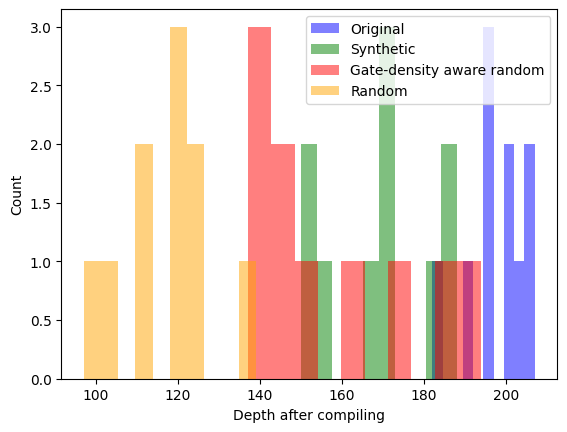

In [25]:
plt.hist(dephts[0], color='blue', alpha=0.5, label='Original')

plt.hist(dephts[1], color='green', alpha=0.5, label='Synthetic')

plt.hist(dephts[2], color='red', alpha=0.5, label='Gate-density aware random')

plt.hist(dephts[3], color='orange', alpha=0.5, label='Random')


plt.legend()
plt.xlabel('Depth after compiling')
plt.ylabel('Count')

plt.show()

### Swaps

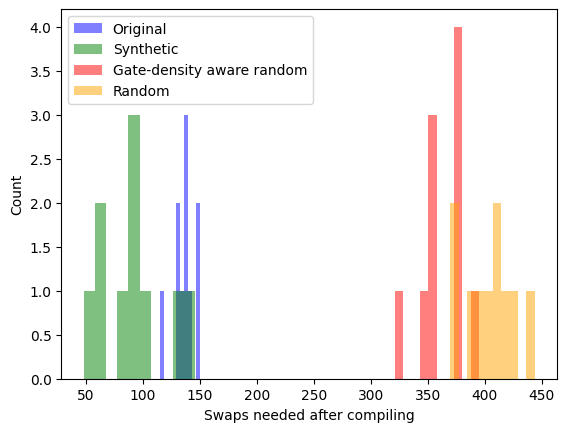

In [26]:
plt.hist(swaps[0], color='blue', alpha=0.5, label='Original')

plt.hist(swaps[1], color='green', alpha=0.5, label='Synthetic')

plt.hist(swaps[2], color='red', alpha=0.5, label='Gate-density aware random')

plt.hist(swaps[3], color='orange', alpha=0.5, label='Random')

plt.legend()
plt.xlabel('Swaps needed after compiling')
plt.ylabel('Count')

plt.show()

## Entropies

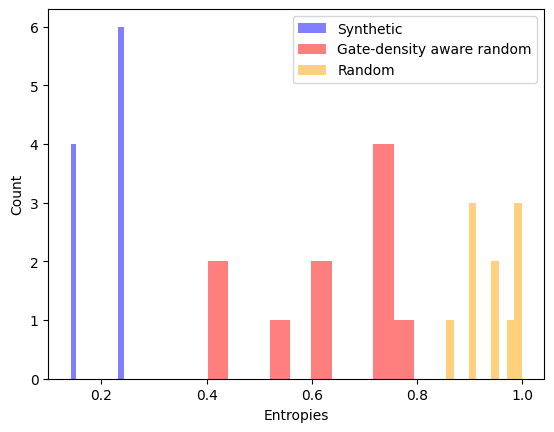

In [32]:
plt.hist(entropias[0], color='blue', alpha=0.5, label='Synthetic')

plt.hist(entropias[1], color='red', alpha=0.5, label='Gate-density aware random')

plt.hist(entropias[2], color='orange', alpha=0.5, label='Random')

plt.legend()
plt.xlabel('Entropies')
plt.ylabel('Count')

plt.show()

## HeatMaps

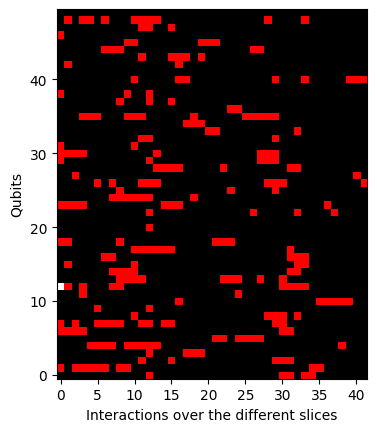

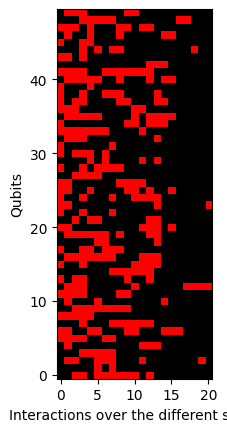

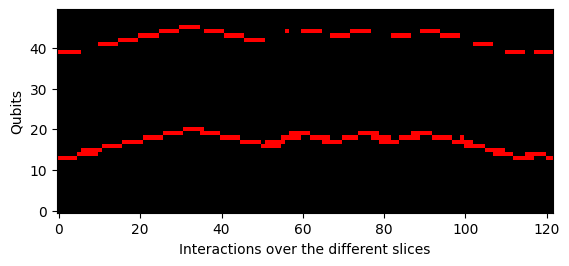

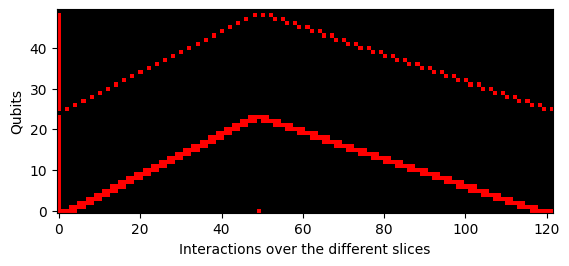

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# QFT(50).decompose(), rc, circuito_sinteticoMountain
#rc, sr = CreaCircuitoRandom(50,depth_a_simular,distrP,probs,matriz_grafo)
#circuito_sinteticoMountain, samples = CreaCircuitoMountain(50,depth_a_simular,distrP,probs,matriz_grafo, cadena_original)


printa_heatmap(rc) # Guided random
printa_heatmap(rc2) #Random
printa_heatmap(circuito_sinteticoMountain) #Synthetic
printa_heatmap(q_circ2, original = -1) # Original one
#printa_heatmap(q_circ2, original = 0)

## Distribution of gates in slices

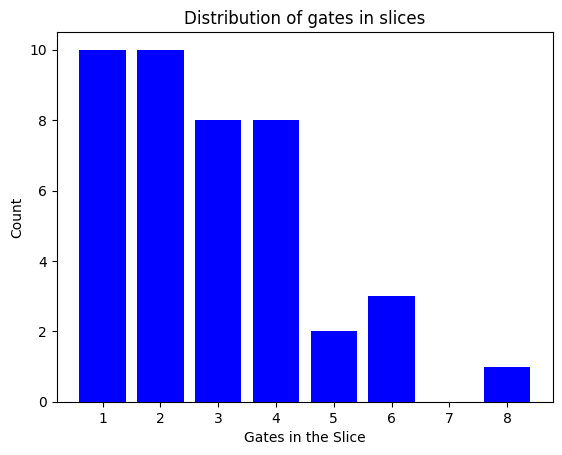

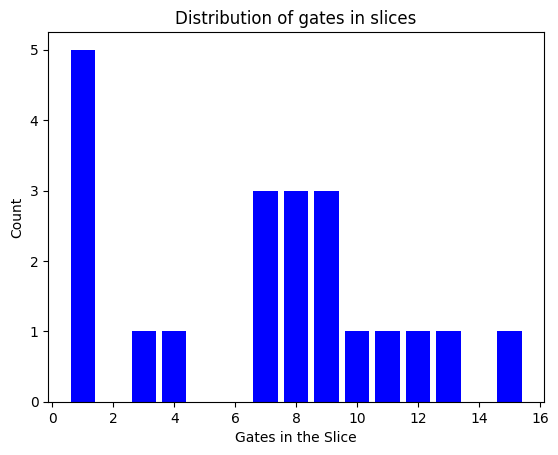

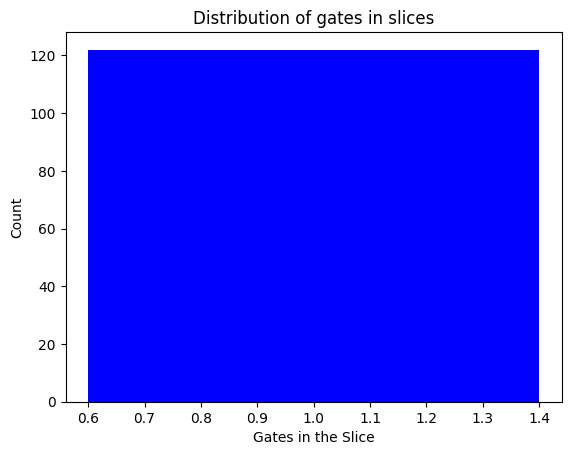

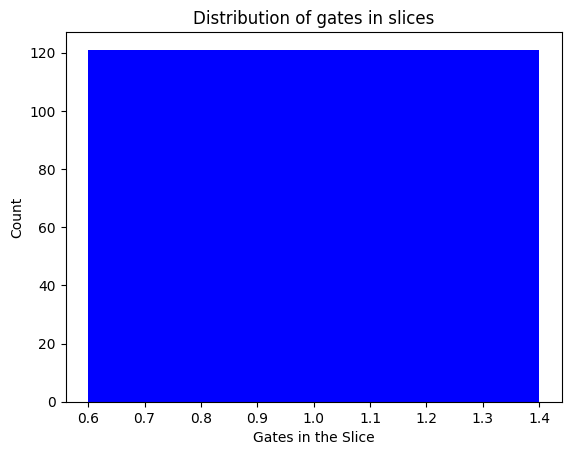

In [29]:
distrR = calcula_distribucion(rc)
distribucion_gates_por_slice(distrR)

distrRR = calcula_distribucion(rc2)
distribucion_gates_por_slice(distrRR)

distrMont = calcula_distribucion(circuito_sinteticoMountain)
distribucion_gates_por_slice(distrMont)

distrOriginalMountain = calcula_distribucion(q_circ2)
distribucion_gates_por_slice(distrOriginalMountain)

###Statistic tests

In [30]:
CompareDistributions(distrR, distrMont)

Statistic of test 1 (Kolmogorov-Smirnov): 0.7619047619047619
P value of test 1: 1.4731006618505049e-18
Statistic of test 2 (Anderson-Darling): 137.23501337573862
P value of test 2: 0.001


<ipython-input-9-561af4df7991>:16: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  result_2 = stats.anderson_ksamp([data1, data2])


## Wasserstein Distance

In [31]:
from scipy.stats import wasserstein_distance

Original = swaps[0]
A_testear =swaps[1]

wasserstein_distance(A_testear,Original)

45.5